     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


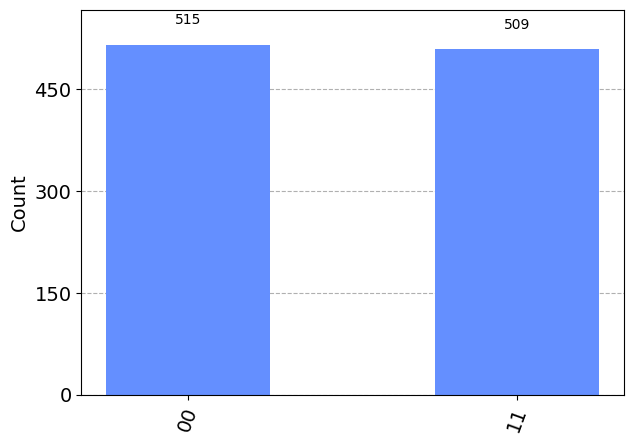

In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Create a simple quantum circuit
qc = QuantumCircuit(2,2)
# h gate
qc.h(0)
# cnot gate
qc.cx(0, 1)

qc.measure([0,1], [0,1])

qasm_simulator = Aer.get_backend('qasm_simulator')

transpiled_circuit = transpile(qc, qasm_simulator)
print(transpiled_circuit)
run_options = {"shots": 1024, "memory": True}
job = qasm_simulator.run(transpiled_circuit, **run_options)

result = job.result()
counts = result.get_counts(qc)

plot_histogram(counts)

